---
### Covid-19 전후 항공수요 변화를 알아보자 
- data source : https://kosis.kr/statHtml/statHtml.do?orgId=381&tblId=DT_920005_B008&conn_path=I2
- lecture : https://www.youtube.com/playlist?list=PLaTc2c6yEwmqrXsGvpB3vK_nAzPEzr-ib
---

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings 
warnings.filterwarnings('ignore')

--- 
#### 항공사별 통계 분석 
- 연평균 여객수, 연간운항편수, 여객 증가율, 도착/출발별 운항편수 및 여객수, 시간대별 화물 운송량 
- 데이터 준비
> 1. 국가통계포털(kosis)의 교통.물류 -> 항공통계 -> 항공사별 통계 페이지 접속 
> 2. 시점/항공사별/도착출발별 x 항목 형태로 행렬전환 
> 3. 조회 설정에서 각 항목의 합계는 제외하고, 전체기간 데이터를 csv로 다운로드 
--- 

In [2]:
# 한국공항공사, 인천국제공항공사,「항공통계」, 2023.09, 2023.11.05, 항공사별 통계
# https://kosis.kr/statHtml/statHtml.do?orgId=381&tblId=DT_920005_B008&conn_path=I2
df_company = pd.read_csv('data/kosis_airline_company.csv', encoding = 'cp949')
print(df_company.shape)
df_company.head()

(3720, 6)


,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311


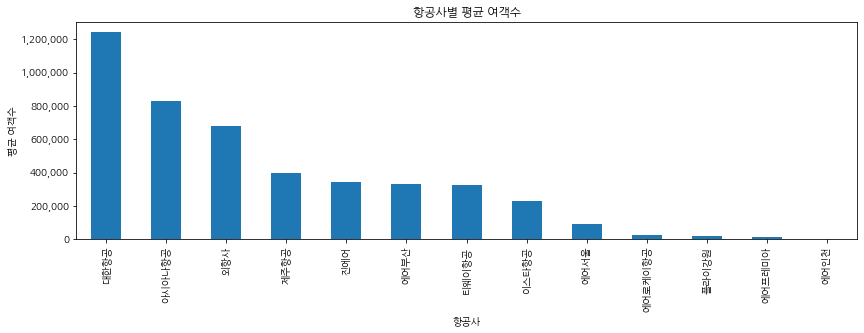

In [3]:
## 항공사별 연평균 여객수 비교 
avg_passengers = df_company.groupby('항공사별(1)')['여객 (명)'].mean()

plt.figure(figsize=(14,4))
avg_passengers.sort_values(ascending=False).plot(kind='bar')
plt.title('항공사별 평균 여객수')
plt.xlabel('항공사')
plt.ylabel('평균 여객수')
## y축 값 표시형식 지정 
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

In [4]:
# 연간 운항 편수 및 여객수 증가율 계산
df_company["운항(편)_증가율"] = df_company.groupby("항공사별(1)")["운항 (편)"].pct_change() * 100
df_company["여객(명)_증가율"] = df_company.groupby("항공사별(1)")["여객 (명)"].pct_change() * 100

df_company.head()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항(편)_증가율,여객(명)_증가율
0,2005.01,아시아나항공,도착,6613,791439,28012,NaN,NaN
1,2005.01,아시아나항공,출발,6610,799835,29576,-0.045365,1.060852
2,2005.01,대한항공,도착,8869,1372897,70544,NaN,NaN
3,2005.01,대한항공,출발,8870,1405847,78329,0.011275,2.400034
4,2005.01,외항사,도착,3145,443386,28311,NaN,NaN


In [5]:
# 도착/출발별 연간 운항 편수 및 여객 수 분석
arrival_stats = df_company[df_company["도착출발별(1)"] == "도착"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()
departure_stats = df_company[df_company["도착출발별(1)"] == "출발"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

arrival_stats

,운항 (편),여객 (명)
시점,,
2005.01,18627,2607722
2005.02,17112,2451062
2005.03,18342,2462065
2005.04,18735,2823164
2005.05,19511,2836185
...,...,...
2023.05,33421,5529102
2023.06,33028,5618913
2023.07,34656,5743000


<AxesSubplot:xlabel='시점'>

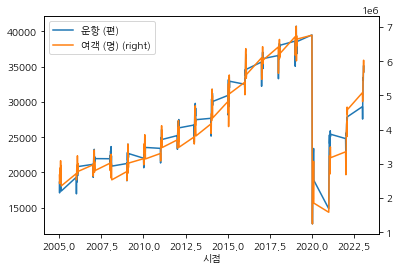

In [6]:
## secondary_y 옵션으로 이중축 차트 생성 
departure_stats.plot(secondary_y="여객 (명)")

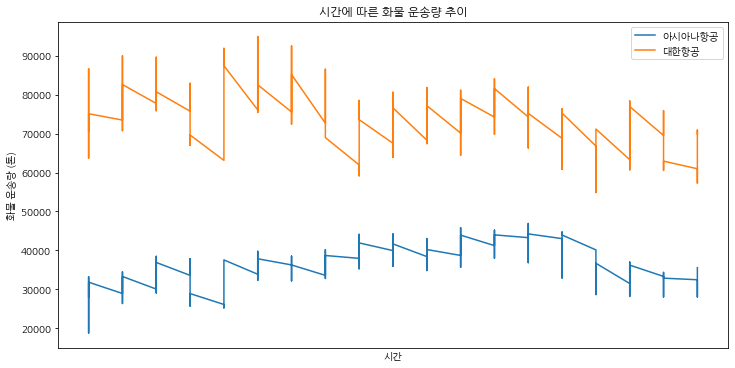

In [7]:
# 시간에 따른 화물 운송량 시각화
df_company["시점"] = pd.to_datetime(df_company["시점"])  # 날짜 형식으로 변환

plt.figure(figsize=(12, 6))
plt.plot(df_company[df_company["항공사별(1)"] == "아시아나항공"]["시점"], df_company[df_company["항공사별(1)"] == "아시아나항공"]["화물 (톤)"], label="아시아나항공")
plt.plot(df_company[df_company["항공사별(1)"] == "대한항공"]["시점"], df_company[df_company["항공사별(1)"] == "대한항공"]["화물 (톤)"], label="대한항공")
plt.xlabel("시간")
plt.ylabel("화물 운송량 (톤)")
plt.legend()
plt.title("시간에 따른 화물 운송량 추이")
plt.show()

In [8]:
df_company

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항(편)_증가율,여객(명)_증가율
0,1970-01-01 00:00:00.000002005,아시아나항공,도착,6613,791439,28012,NaN,NaN
1,1970-01-01 00:00:00.000002005,아시아나항공,출발,6610,799835,29576,-0.045365,1.060852
2,1970-01-01 00:00:00.000002005,대한항공,도착,8869,1372897,70544,NaN,NaN
3,1970-01-01 00:00:00.000002005,대한항공,출발,8870,1405847,78329,0.011275,2.400034
4,1970-01-01 00:00:00.000002005,외항사,도착,3145,443386,28311,NaN,NaN
...,...,...,...,...,...,...,...,...
3715,1970-01-01 00:00:00.000002023,에어로케이항공,출발,314,44454,245,0.000000,3.891187
3716,1970-01-01 00:00:00.000002023,에어프레미아,도착,111,29206,1367,-11.200000,-18.500949
3717,1970-01-01 00:00:00.000002023,에어프레미아,출발,111,32302,1453,0.000000,10.600562
3718,1970-01-01 00:00:00.000002023,외항사,도착,6585,925104,50054,-1.994344,-12.460363


- '시점'의 형태를 변경해줄 필요가 있다. 기타 분석편의를 위해 연/월 컬럼 등도 필요 
- 컬럼명도 보기 좋게 바꿔준다. 
- --> 데이터를 다시 불러와 초기화한다. 
--- 

In [9]:
## 시점을 object 타입으로 불러온다. 
df_comp = pd.read_csv('data/kosis_airline_company.csv', encoding='cp949', dtype={'시점':'object'})
print(df_comp.shape)
df_comp.head(2)

(3720, 6)


,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576


In [10]:
## 컬럼명 변경 
df_comp.columns = ['시점', '항공사', '도착출발', '운항_편', '여객_명', '화물_톤']
df_comp.head(2)

,시점,항공사,도착출발,운항_편,여객_명,화물_톤
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576


In [20]:
## 연, 월 변수 생성 
df_comp['연도'] = df_comp['시점'].astype(str).str[:4].astype(int)
df_comp['월'] = df_comp['시점'].astype(str).str[5:7].astype(int)
#df_comp['월'] = df_comp['시점'].map(lambda x: x.split('.')[1][:2]).astype(int)

print(df_comp['연도'].unique())
print(df_comp['월'].unique())
df_comp.tail(2)

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022 2023]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


,시점,항공사,도착출발,운항_편,여객_명,화물_톤,연도,월
3718,2023.09,외항사,도착,6585,925104,50054,2023,9
3719,2023.09,외항사,출발,6606,965135,52959,2023,9


In [12]:
## 연도별, 항공사별 여객수
year_comp = pd.crosstab(index=df_comp["연도"],
            columns=df_comp["항공사"],
            values=df_comp["여객_명"],
            aggfunc="sum").fillna(0)
year_comp.style.background_gradient(axis=None).format("{:,.0f}")

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,"34,721,098","18,535,331",0,0,0,0,0,"11,319,209",0,0,0,0,0
2006,"34,990,013","19,284,957",0,0,0,0,0,"12,856,097",0,"508,612",0,0,0
2007,"34,654,664","19,352,387",0,0,0,0,0,"15,483,064",0,"1,649,508",0,0,0
2008,"33,096,441","19,786,251",0,"205,580",0,0,0,"14,579,456",0,"1,955,455","329,510",0,0
2009,"30,397,856","18,103,278",0,"2,841,444",0,0,0,"11,579,865","1,996,549","2,902,584","2,431,545",0,0
2010,"33,095,526","19,470,441",0,"4,134,712",0,0,0,"13,495,430","3,726,008","3,960,525","3,009,247","308,876",0
2011,"31,644,789","19,692,263",0,"4,632,692",0,0,0,"14,590,031","3,366,115","5,365,058","3,096,266","2,999,202",0
2012,"32,412,913","20,541,440",0,"4,955,130",0,0,0,"15,982,369","3,918,272","6,551,702","3,893,786","3,498,629",0
2013,"30,837,092","21,158,822",0,"5,855,989",0,0,0,"17,819,459","4,639,327","7,567,220","4,655,414","4,106,794",0


<AxesSubplot:title={'center':'저가항공 연도별 여객 수'}, xlabel='연도'>

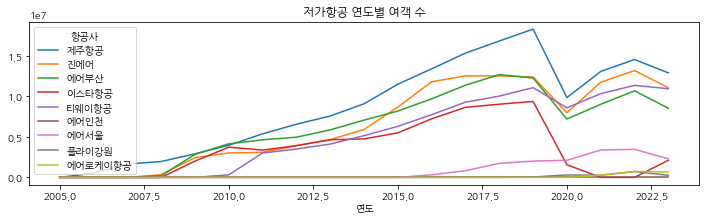

In [13]:
llc_list = ['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
            '에어인천', '에어서울', '플라이강원', '에어로케이항공'] 

year_comp[llc_list].plot(figsize=(12, 3), title="저가항공 연도별 여객 수")

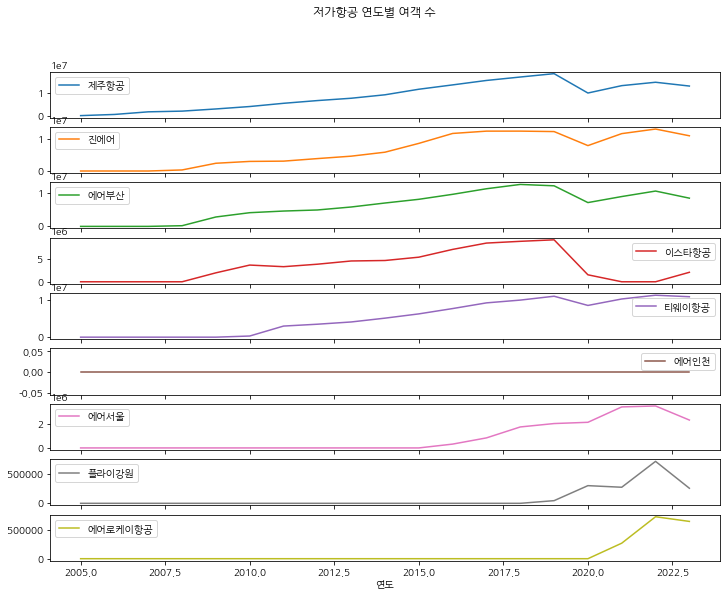

In [14]:
year_comp[llc_list].plot(figsize=(12, 9), title="저가항공 연도별 여객 수", subplots=True);

In [15]:
## 연도별, 항공사별 운항편수 
year_comp = pd.crosstab(index=df_comp["연도"],
            columns=df_comp["항공사"],
            values=df_comp["운항_편"],
            aggfunc="sum").fillna(0)
year_comp.style.background_gradient(axis=None, cmap="Greens").format("{:,.0f}")

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,"211,868","149,283",0,0,0,0,0,"80,798",0,0,0,0,0
2006,"212,738","146,808",0,0,0,0,0,"98,587",0,"9,568",0,0,0
2007,"220,360","145,843",0,0,0,0,0,"126,258",0,"27,152",0,0,0
2008,"217,270","156,893",0,"2,988",0,0,0,"122,093",0,"25,850","4,176",0,0
2009,"205,682","138,039",0,"29,782",0,0,0,"87,488","16,339","29,684","20,238",0,0
2010,"205,596","134,779",0,"37,230",0,0,0,"95,422","28,387","26,449","18,761","3,286",0
2011,"204,322","138,614",0,"38,162",0,0,0,"103,867","26,739","32,030","20,072","19,789",0
2012,"214,577","141,423",0,"39,710",0,0,0,"113,579","30,227","39,696","24,249","21,502",0
2013,"210,492","147,175",0,"46,911",0,416,0,"125,595","33,275","45,558","29,018","24,049",0


In [16]:
## 연도별, 항공사별 화물수송량 
year_comp = pd.crosstab(index=df_comp["연도"],
            columns=df_comp["항공사"],
            values=df_comp["화물_톤"],
            aggfunc="sum").fillna(0)
year_comp.style.background_gradient(axis=None, cmap="Oranges").format("{:,.0f}")

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,"1,819,380","685,632",0,0,0,0,0,"856,586",0,0,0,0,0
2006,"1,879,078","762,478",0,0,0,0,0,"919,935",0,"2,554",0,0,0
2007,"1,954,382","788,058",0,0,0,0,0,"1,020,715",0,"7,968",0,0,0
2008,"1,814,978","781,787",0,"2,688",0,0,0,"894,448",0,"10,437","1,548",0,0
2009,"1,829,704","755,899",0,"22,502",0,0,0,"763,007","10,088","17,570","11,060",0,0
2010,"1,984,831","854,546",0,"29,819",0,0,0,"922,326","18,540","24,025","15,141","1,418",0
2011,"1,940,378","849,214",0,"35,402",0,0,0,"895,267","17,466","31,583","17,754","13,305",0
2012,"1,813,203","861,968",0,"37,500",0,0,0,"917,498","22,318","43,824","24,860","18,162",0
2013,"1,687,503","953,876",0,"43,707",0,"2,909",0,"929,790","27,465","53,750","31,009","21,623",0


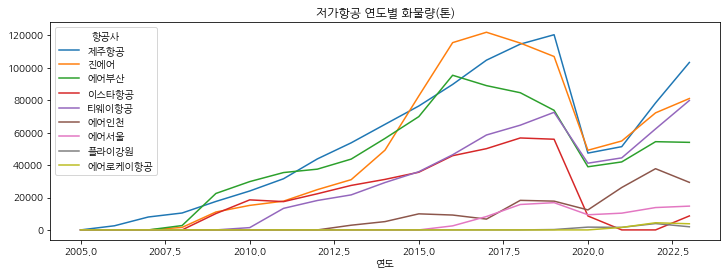

In [24]:
year_comp[llc_list].plot(figsize=(12, 4), title="저가항공 연도별 화물량(톤)");